#**Valores atípicos (outliers)**

In [1]:
import pandas as pd
import missingno as ms
import numpy as np 

data_adult = pd.read_csv('https://raw.githubusercontent.com/SergioGerman412/Machine-Learning/main/adult.csv')
data_adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


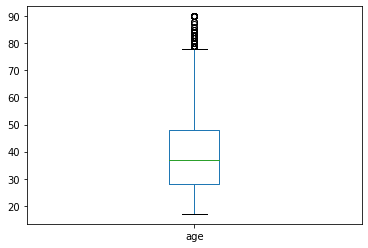

In [2]:
data_adult['age'].plot.box()

*Antes de eliminar hay que analizar*

- ¿realmente son valores atípicos?
- ¿Por qué eliminar?

**comenzamos**

1. Para la variable age (edad), elimine los valores que están muy alejados de la media. Considere como valores alejados de la media a aquellos se alejan 2 desviaciones estándar de la media. 
2. Imprima la media y la desviación estándar de la variable age (edad) antes y después de eliminar los outliers.

 ![texto alternativo](https://drive.google.com/uc?export=view&id=1JJ5qw32Tnx2gjEnLOd0xs6c-kKLj8IJW)


##**eliminando valores alejados de la media aquellos que se alejan 2 desviaciaciones estándar de la media**

**a. Para la variable age (edad), elimine los valores que están muy alejados de la media. Considere como valores alejados de la media a aquellos se alejan 2 desviaciones estándar de la media.**

In [3]:
#aplicamos lo explicado en la clase sobre la consulta de este ejercicio
std = 2*data_adult['age'].std() + data_adult['age'].mean()
std2 = 2*data_adult['age'].std() - data_adult['age'].mean()

In [4]:
data_clean = data_adult.age [~ ((data_adult.age <std2) | (data_adult.age> std))]

In [5]:
print('Valores atípicos identificados:', len([x for x in data_adult['age'] if x < std2 or x > std]))
print('Valores no atípicos identificados:', len([x for x in data_adult['age'] if x >= std2 and x <= std]))

Valores atípicos identificados: 1158
Valores no atípicos identificados: 31402


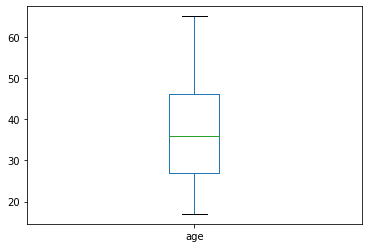

In [6]:
#ejecutamos un boxplot para comprobar que no hay outliers
data_clean.plot.box()

*Otra forma de llegar a la solución, se puede sacar de este link como guía*
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ desviacion estandar de 2 - 3

**b. Imprima la media y la desviación estándar de la variable age (edad) antes y después de eliminar los outliers.**

*antes*

In [7]:
# Imprimimos la media y la desviación estándar antes de eliminar los outliers.
print('La media de la variable "age" antes de eliminar los outliers es de:', data_adult['age'].mean())
print('La desviación estándar de la variable "age" antes de eliminar los outliers es de:', np.std(data_adult.age))

La media de la variable "age" antes de eliminar los outliers es de: 38.581633906633904
La desviación estándar de la variable "age" antes de eliminar los outliers es de: 13.640432356540156


*después*

In [8]:
# Imprimimos la media y la desviación estándar antes de eliminar los outliers.
print('La media de la variable "age" después de eliminar los outliers es de:', data_clean.mean())
print('La desviación estándar de la variable "age" después de eliminar los outliers es de:', np.std(data_clean))

La media de la variable "age" después de eliminar los outliers es de: 37.35676071587797
La desviación estándar de la variable "age" después de eliminar los outliers es de: 12.227484425692248


##**segundo método**

In [9]:
df = pd.read_excel("https://github.com/aurea-soriano/ML-Datasets/blob/master/Sample%20-%20Superstore.xls?raw=true")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


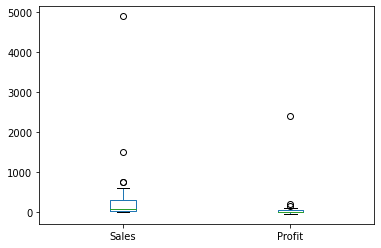

In [10]:
df_sample = df[['Customer Name', 'State', 'Sales', 'Profit']].sample(n=50).copy()
df_sample.plot.box()

El rango intercuartil , a menudo denominado «IQR», es una forma de medir la dispersión del 50% medio de un conjunto de datos.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


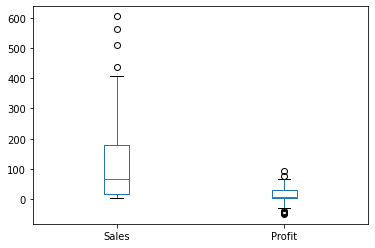

In [11]:
#IQR  Se calcula como la diferencia entre el primer cuartil * (el percentil 25) y el tercer cuartil (el percentil 75) de un conjunto de datos.

Q1=df_sample.quantile(0.25)
Q3=df_sample.quantile(0.75)
IQR=Q3-Q1

df_sample[~( (df_sample<Q1-1.5*IQR) |  (df_sample>Q3+1.5*IQR) )].plot.box()

PRIMER CUARTIL

In [13]:
Q1

Sales     17.742
Profit     3.378
Name: 0.25, dtype: float64

IQR

In [14]:
IQR

Sales     285.3060
Profit     36.5754
dtype: float64

TERCER CUARTIL

In [12]:
Q3

Sales     303.0480
Profit     39.9534
Name: 0.75, dtype: float64

 ![texto alternativo](https://drive.google.com/uc?export=view&id=1JJ5qw32Tnx2gjEnLOd0xs6c-kKLj8IJW)


**Se recomienda variable por variable**